In [5]:
import datetime
import random
from collections import defaultdict
from collections import Counter
from matplotlib import pyplot as plt
import random
from scipy.stats import norm
import math
from typing  import Callable
import random
import numpy as np
from dateutil.parser import parse
import math
from collections import namedtuple
from typing import NamedTuple
import tqdm

#### Linear algebra

In [6]:
Vector = list[float]
def add(v: Vector, w: Vector) -> Vector:
    assert len(v) == len(w), "vectors must be the same length"
    return [v_i + w_i for v_i, w_i in zip(v, w)]

def subtract(v: Vector, w: Vector) -> Vector:
    assert len(v) == len(w), "vectors must be the same length"
    return [v_i - w_i for v_i, w_i in zip(v, w)]

def vector_sum(vectors: list[Vector]) -> Vector:
    assert vectors, "no vectors provided!"
    num_elements = len(vectors[0])
    assert all(len(vector) == num_elements for vector in vectors), "different sizes!"
    return [sum(vector[i] for vector in vectors)
            for i in range(num_elements)]

def scalar_multiply(c: float, v: Vector) -> Vector:
    return [c * v_i for v_i in v]

def vector_mean(vectors: list[Vector]) -> Vector:
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

def dot(v: Vector, w: Vector) -> float:
    assert len(v) == len(w), "vectors must be same length"
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v: Vector) -> float:
    return dot(v, v)

def magnitude(v: Vector) -> float:
    return math.sqrt(sum_of_squares(v))

def distance(v: Vector, w: Vector) -> float:
    return magnitude(subtract(v, w))

Matrices

In [7]:
Matrix = list[list[float]]
def shape(A: Matrix) -> tuple[int, int]:
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

def get_row(A: Matrix, i: int) -> Vector:
    """Returns the i-th row of A (as a Vector)"""
    return A[i] # A[i] is already the ith row

def get_column(A: Matrix, j: int) -> Vector:
    """Returns the j-th column of A (as a Vector)"""
    return [A_i[j] # jth element of row A_i
    for A_i in A] # for each row A_i

def make_matrix(num_rows: int,
                num_cols: int,
                entry_fn: Callable[[int, int], float]) -> Matrix:
    """
    Returns a num_rows x num_cols matrix
    whose (i,j)-th entry is entry_fn(i, j)
    """
    return [[entry_fn(i, j) # given i, create a list
            for j in range(num_cols)] # [entry_fn(i, 0), ... ]
            for i in range(num_rows)] # create one list for each i

def identity_matrix(n: int) -> Matrix:
    """Returns the n x n identity matrix"""
    return make_matrix(n, n, lambda i, j: 1 if i == j else 0)

#### Statistics

In [8]:
num_friends = [100, 49, 41, 40, 25, 10, 30, 25, 34, 12, 14]

friend_counts = Counter(num_friends)
xs = range(101) # largest value is 100
ys = [friend_counts[x] for x in xs]
print(ys)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


The Normal Distribution

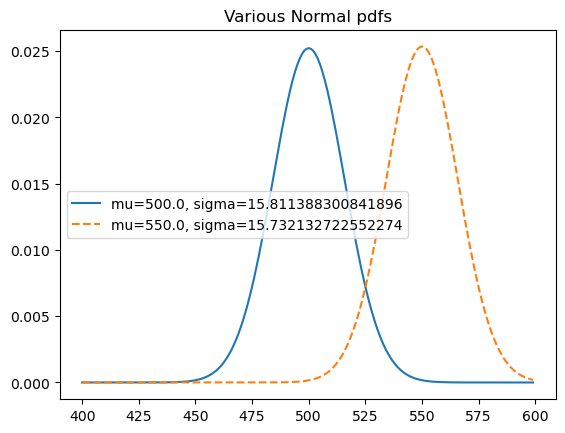

In [9]:
SQRT_TWO_PI = math.sqrt(2 * math.pi)
def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

def normal_approximation_to_binomial(n: int, p: float) -> tuple[float, float]:
    """Returns mu and sigma corresponding to a Binomial(n, p)"""
    mu = p * n
    sigma = math.sqrt(p * (1 - p) * n)
    return mu, sigma

xs = [x for x  in range(400, 600)]

mu1, sigma1 = normal_approximation_to_binomial(1000, 0.5)
mu2, sigma2 = normal_approximation_to_binomial(1000, 0.55)

plt.plot(xs, [normal_pdf(x, mu1, sigma1) for x in xs],'-', label=f'mu={mu1}, sigma={sigma1}')
plt.plot(xs,[normal_pdf(x,mu2, sigma2) for x in xs],'--',label=f'mu={mu2}, sigma={sigma2}')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

#### Working with data

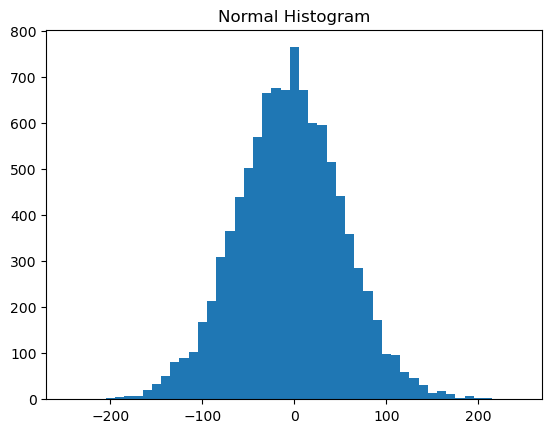

In [10]:
def bucketize(point: float, bucket_size: float) -> float:
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points: list[float], bucket_size: float) -> dict[float, int]:
    """Buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points: list[float], bucket_size: float, title: str = ""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)

uniform = [200 * random.random() - 100 for _ in range(10000)]

normal = [57 * norm.ppf(random.random())
          for _ in range(10000)]

plot_histogram(normal, 10, "Normal Histogram")

Named tuple

In [11]:
StockPrice = namedtuple('StockPrice', ['symbol', 'date', 'closing_price'])
price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)

assert price.symbol == 'MSFT'

class StockPrice(NamedTuple): # Inheritance
    symbol: str
    date: datetime.date
    closing_price: float

    def is_high_tech(self) -> bool:
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']

price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)

assert price.is_high_tech()

def parse_row(row: list[str]) -> StockPrice:
    symbol, date, closing_price = row
    return  StockPrice(symbol=symbol,
                       date=parse(date).date(),
                       closing_price=float(closing_price))
stock = parse_row(["MSFT", "2018-12-14", "106.03"])
class DailyChange(NamedTuple):
    symbol: str
    date: datetime.date
    pct_change: float

changes_by_month: list[DailyChange] = {month: [] for month in range(1,13)}
print(changes_by_month)

{1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: []}


Rescaling

In [12]:
def scale(data: list[np.array]) -> tuple[np.array, np.array]:
    means = np.mean(data, 0)
    stdevs = np.std(data, 0)
    return means, stdevs

def rescale(data: list[np.array]) -> list[np.array]:
    dim = len(data[0])
    means, stdevs = scale(data)
    # Make a copy of each vector
    rescaled = [v[:] for v in data]
    for v in rescaled:
        for i in range(dim):
            if stdevs[i] > 0:
                v[i] = (v[i] - means[i]) / stdevs[i]
    return rescaled

vectors = [[-3, -1, 1], [-1, 0, 1], [1, 1, 1]]
print(scale(vectors))
print(rescale(vectors))

(array([-1.,  0.,  1.]), array([1.63299316, 0.81649658, 0.        ]))
[[-1.224744871391589, -1.224744871391589, 1], [0.0, 0.0, 1], [1.224744871391589, 1.224744871391589, 1]]


#### tqdm - progress bars

In [13]:
for i in tqdm.tqdm(range(100)):
    # do something slow
    _ = [random.random() for _ in range(10000)]

100%|██████████| 100/100 [00:00<00:00, 763.99it/s]


#### Finding Key Connectors

In [14]:

users = [
    {"id": 0, "name": "Hero"},
    {"id": 1, "name": "Dunn"},
    {"id": 2, "name": "Sue"},
    {"id": 3, "name": "Chi"},
    {"id": 4, "name": "Thor"},
    {"id": 5, "name": "Clive"},
    {"id": 6, "name": "Hicks"},
    {"id": 7, "name": "Devin"},
    {"id": 8, "name": "Kate"},
    {"id": 9, "name": "Klein"}
]

friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
                    (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)


def most_common_interests_with(user):
    return Counter(
        interested_user_id
        for interest in interests_by_user_id[user["id"]]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user["id"]
    )


counter = most_common_interests_with(users[4])
print(counter)

Counter({7: 1, 3: 1})


Generators

In [15]:

def natural_numbers():
    """returns 1, 2, 3, ..."""
    n = 1
    while True:
        yield n
        n += 1

data = natural_numbers()
evens = (x for x in data if x % 2 == 0)
print(evens)

<generator object <genexpr> at 0x000002330827CA50>
